In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview:

The below method is used to generate occupany grid maps (OGMs). The number of grid cells can be altered based on user definitions.

For demonstration purpose, **sample 14** from **scene 33** is considered here.

In [2]:
data = pd.read_csv('sample_33_14.csv')
data.head()

,x,y,rotation,height,width,category,visibility,x_anchor,y_anchor,heading_angle,x2,y2,x3,y3,x4,y4
0,1075.890979,811.191884,"(0.9321771452171864, 0.0010142871793830878, 0....",1.730,4.084,ego,4.0,1073.800256,811.931387,-42.436755,1076.814340,809.175602,1077.981703,810.452381,1074.967618,813.208167
1,1151.539000,759.740000,"(0.9890673983243704, 0.0, 0.0, -0.147464170468...",2.938,11.245,vehicle.bus.rigid,3.0,1145.732517,759.974995,-16.960000,1156.488457,756.694783,1157.345483,759.505005,1146.589543,762.785217
2,1017.953000,867.716000,"(0.4882938066505476, 0.0, 0.0, 0.8726792987041...",1.874,4.045,vehicle.car,4.0,1019.809603,866.482509,121.543000,1017.693509,869.929852,1016.096397,868.949491,1018.212491,865.502148
3,1029.398000,844.892000,"(0.9448917874686396, 0.0, 0.0, -0.327382818691...",0.519,0.539,human.pedestrian.adult,4.0,1029.025722,844.854861,-38.220000,1029.449182,844.521391,1029.770278,844.929139,1029.346818,845.262609
4,1089.055000,778.433000,"(0.7775521967618003, 0.0, 0.0, 0.6288184009003...",2.205,7.442,vehicle.truck,4.0,1089.354771,774.563700,77.926000,1090.911450,781.841070,1088.755229,782.302300,1087.198550,775.024930


# OGM principle:

## Generate empty OGM:



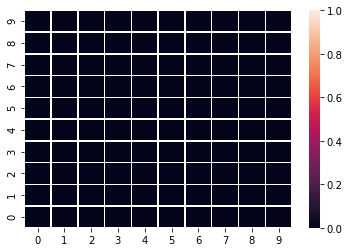

In [3]:
base_ogm = np.zeros((10,10))

ax = sns.heatmap(base_ogm, linewidth=0.5,vmin=0, vmax=1)
ax.invert_yaxis()
plt.show()

## Neglect unwanted objects in scene:

_Not all objects in the scene were considered for BEV generation. Let's neglect these object and only consider the relevant objects._

In [4]:
objects = ["ego", "vehicle.car", "vehicle.trailer", "vehicle.emergency.police", "vehicle.bicycle", "vehicle.motorcycle","vehicle.bus.bendy",
  "vehicle.bus.rigid", "vehicle.truck", "vehicle.emergency.ambulance", "human.pedestrian.adult", "human.pedestrian.child", "human.pedestrian.construction_worker",
  "human.pedestrian.personal_mobility", "human.pedestrian.police_officer", "human.pedestrian.stroller","human.pedestrian.wheelchair"]

In [5]:
x_grids = []
y_grids = []

x_original = []
y_original = []

# 80m is considered here as it was the same distance considered while generating BEV:
x_origin = data['x'][0]-80
y_origin = data['y'][0]-80

In the below code we are calculating the distance covered by each grid cell by taking the total distance covered by the BEV in one direction (i.e 80m * 2 = 160 m) and dividing it with the number of desired grid cells in one direction which is 10 cells (this results in an OGM that is (10,10) in shape.

In [6]:
grid_cell_distance = int((80*2) / 10)

for i in range(0, len(data)):
    if data['category'][i] in objects:
        x_original.append((data['x'][i]-x_origin)/grid_cell_distance)
        y_original.append((data['y'][i]-y_origin)/grid_cell_distance)
        
        x_grids.append(int(np.ceil((data['x'][i]-x_origin)/grid_cell_distance)))
        y_grids.append(int(np.ceil((data['y'][i]-y_origin)/grid_cell_distance)))

In [7]:
print("The x_original values are: ", x_original)
print("The y_original values are: ", y_original, "\n")

print("The x_grid values are: ", x_grids)
print("The y_grid values are: ", y_grids)

The x_original values are:  [5.0, 9.728001302338185, 1.3788763023381847, 2.0941888023381807, 5.82275130233819, 2.918876302338191]
The y_original values are:  [5.0, 1.7842572245783188, 8.532757224578319, 7.1062572245783215, 2.952569724578318, 6.894319724578317] 

The x_grid values are:  [5, 10, 2, 3, 6, 3]
The y_grid values are:  [5, 2, 9, 8, 3, 7]


## Update cell occupany:

_Here the OGM is a numpy array which starts at 0 index. So, grid cell 1 is indexed as 0._

In [8]:
for x, y in zip(x_grids, y_grids):
    base_ogm[int(y-1), int(x-1)] = 1
    
print(base_ogm)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Reshape the array to match BEV:

In [9]:
print(np.flip(base_ogm, axis=0))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Plot OGM and compare with BEV:

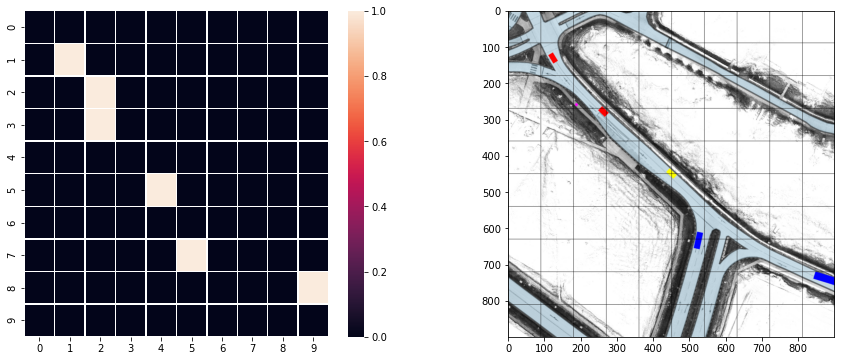

The x_grid values are:  [5, 10, 2, 3, 6, 3]
The y_grid values are:  [5, 2, 9, 8, 3, 7]


In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

ax = sns.heatmap(np.flip(base_ogm, axis=0), ax=axs[0], linewidth=0.5,vmin=0, vmax=1)

# Load the image
img = plt.imread("sample_33_14.png")
img = img[:,:,0:3]

# Grid lines at these intervals (in pixels)
# dx and dy can be different
dx, dy = 90, 90

# Custom (rgb) grid color
grid_color = [0,0,0]

# Modify the image to include the grid
img[:,::dy,:] = grid_color
img[::dx,:,:] = grid_color

# Show the result
axs[1].imshow(img)

plt.show()

print("The x_grid values are: ", x_grids)
print("The y_grid values are: ", y_grids)

## Problems related to the current principle of OGM generation:

1. There might be instances where the point coincides with the grid line intersection (Ex: the center of EGO always coincides with the grid line intersection at the center of BEV). In this case, the code allots occupany to a cell that is 1 step behind which is not correct. We need to neglect such points.

2. There might be some points that lie outside the BEV i.e greater than 80m. This will throw an error during occupany allotment as the grid cell will be outside the considered number. We need to neglect such points as well.

**_These conditions are satisfied by using multiple conditions as show below before allotment_**

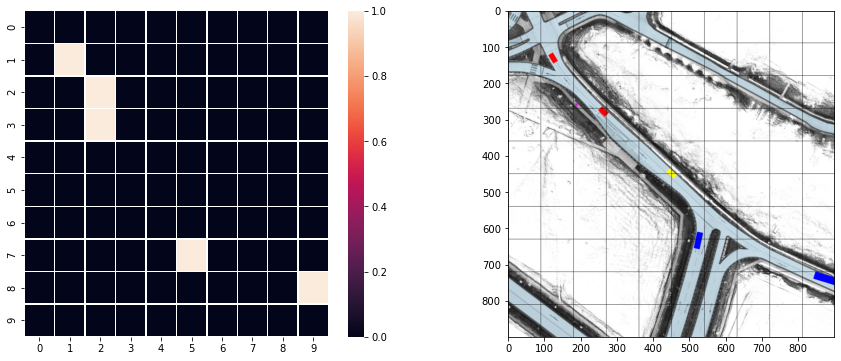

The x_grid values are:  [5, 10, 2, 3, 6, 3]
The y_grid values are:  [5, 2, 9, 8, 3, 7]


In [11]:
# Neglecting points that co-incide with the grid lines
base_ogm_2 = np.zeros((10,10))

for x, y in zip(x_original, y_original):
    if (not x.is_integer() and not y.is_integer()) and (np.ceil(x) <= 10 and np.ceil(y) <= 10):
        base_ogm_2[int(np.ceil(y)) - 1, int(np.ceil(x)) - 1] = 1
        
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

ax = sns.heatmap(np.flip(base_ogm_2, axis=0), ax=axs[0], linewidth=0.5,vmin=0, vmax=1)

# Load the image
img = plt.imread("sample_33_14.png")
img = img[:,:,0:3]

# Grid lines at these intervals (in pixels)
# dx and dy can be different
dx, dy = 90, 90

# Custom (rgb) grid color
grid_color = [0,0,0]

# Modify the image to include the grid
img[:,::dy,:] = grid_color
img[::dx,:,:] = grid_color

# Show the result
axs[1].imshow(img)

plt.show()

print("The x_grid values are: ", x_grids)
print("The y_grid values are: ", y_grids)

**_As seen above, the EGO's center that coincides with the grid line intersection has been removed. The allotment will be made by using the other 4 corners of the EGO which creates a more accurate OGM._**

## Conclusion:

1. Here only the center of objects have been considered. But, during implementation the other 4 corners of the bounding box (x_anchor, y_anchor, x2, y2, x3, y3, x4, y4 as seen in the Data Frame) are considered for allotment which generates a more accurate OGM. 

2. The same principle is used to create OGMs for the project.